In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In our network analysis, we focus on the Musicians network to narrow the scope and enable a more in-depth exploration. This network was selected because it exhibits simple yet interesting properties that are more intuitive and relatable than those found in the Music Groups network.

In [14]:
# Load graph
with open("data/Musicians_graph.pkl", "rb") as f:
    G = pickle.load(f)

We calculate the probability (p) average degree (k) of the network 
ref[Section 3.2, equation (3.2) in Network Science, Albert-Laszlo Barabasi]

In [18]:
N = G.number_of_nodes()
L = G.number_of_edges()

p = L / ((N*(N-1))/2)  # for undirected graphs, we divide by 2

k = p*(G.number_of_nodes() - 1)

print(f"Probability: {p}")
print(f"Average degree: {k}")

Probability: 0.00529370419262786
Average degree: 20.30135557872784


The average degreee is 20, so on average a musician is sharing associated music groups with 20 other musicians.
___


Now, we write a function to generate a Random Network that mirrors the Danish Musicians Network in terms of node count, using your calculated p. We generate the random network by linking nodes in every possible pair with probability.

In [19]:
def random_network(N,p):
    
    #Start with N isolated nodes.
    R = nx.Graph()
    R.add_nodes_from(range(N))

    #Select a node pair and generate a random number between 0 and 1
    for u in range(N):
        for v in range(u+1,N):
            if np.random.rand() < p: #If the number exceeds p:
                R.add_edge(u,v) #connect the selected node pair with a link, otherwise leave them disconnected.
    return R

F = random_network(N,p)

In [30]:
# visualize the graph F and G in the same figure
def plot_2graphs(G, F):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)

    plt.title("Random Network")
    plt.axis('off')
    pos = nx.spring_layout(F)
    nx.draw(F, pos, node_size=10, node_color='blue', alpha=0.5, width=0.2)
    plt.subplot(1, 2, 2)
    plt.title("Original Network")
    plt.axis('off')
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=10, node_color='red', alpha=0.5, width=0.2)
    plt.show()

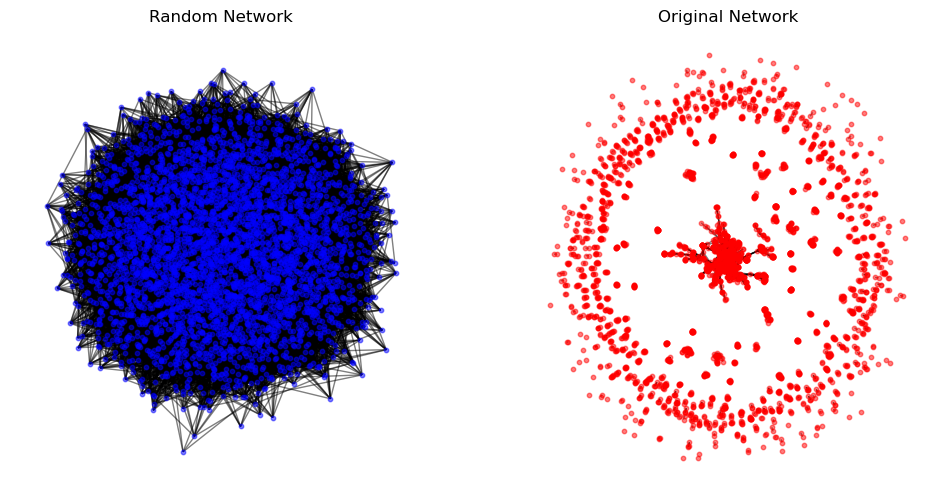

In [ ]:
plot_2graphs(G, F)

In [24]:
N_f = F.number_of_nodes()
L_f = F.number_of_edges()

p_f = L / ((N_f*(N_f-1))/2)  # for undirected graphs, we divide by 2

k_f = p*(F.number_of_nodes() - 1)

print(f"Probability: {p_f}")
print(f"Average degree: {k_f}")

Probability: 0.0052915289584842965
Average degree: 20.293013555787276


A lot of musicians are isolated as they are solo artists. We try to look only at the giant component.

In [32]:
G_components = nx.connected_components(G)
G_largest_component = max(G_components, key=len)
G_giant = G.subgraph(G_largest_component)

N_giant = G_giant.number_of_nodes()
p_giant = G_giant.number_of_edges() / ((N_giant*(N_giant-1))/2)  # for undirected graphs, we divide by 2

F_giant = random_network(N_giant,p_giant)

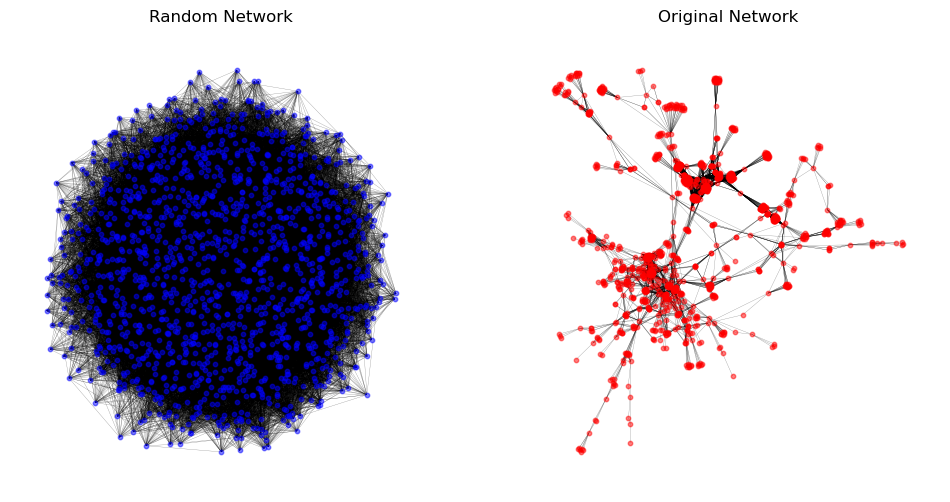

In [33]:
plot_2graphs(G_giant, F_giant)